In [2]:
import pandas as pd

## Import neighborhood geolocation data

In [41]:
neighborhoods=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Minneapolis_Neighborhoods.csv')

In [43]:
neighborhoods.head()

,FID,BDNAME,BDNUM,TEXT_NBR,Shape_STAr,Shape_STLe,NCR_LINK,IMAGE
0,1,Phillips West,90,90,1.066925e+07,14403.885934,http://www.nrp.org/r2/Neighborhoods/Orgs/PHW.html,PHW
1,2,Downtown West,87,87,2.075613e+07,19220.602541,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN
2,3,Downtown East,88,88,1.025499e+07,13436.601356,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN
3,4,Ventura Village,89,89,1.263526e+07,16988.532717,http://www.nrp.org/r2/Neighborhoods/Orgs/VEN.html,VEN
4,5,Sumner - Glenwood,29,29,5.741860e+06,11065.343364,http://www.nrp.org/r2/Neighborhoods/Orgs/SGL.html,SGL


## Prepare crime data set

In [2]:
dfCrime=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/NEIGHBORHOOD_CRIME_STATS.csv')

In [13]:
dfCrime.head()

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear,neighborhood_lower
0,1001.0,JORDAN,Aggravated Assault,9.0,9.0,2017.0,jordan
1,1002.0,JORDAN,Arson,1.0,9.0,2017.0,jordan
2,1003.0,JORDAN,Auto Theft,11.0,9.0,2017.0,jordan
3,1004.0,JORDAN,Burglary,6.0,9.0,2017.0,jordan
4,1005.0,JORDAN,Homicide,NaN,9.0,2017.0,jordan


In [12]:
dfCrime['neighborhood_lower']=dfCrime.neighborhood.str.lower()

In [14]:
dfCrime.neighborhood_lower.value_counts()

elliot park                         232
humboldt industrial area            232
logan park                          232
central                             232
lynnhurst                           232
                                   ... 
corcoran                            232
z_** not assigned **                152
steven's square - loring heights    152
stevens square - loring heights      80
** not assigned **                   80
Name: neighborhood_lower, Length: 90, dtype: int64

In [31]:
c=dfCrime.groupby('ucrDescription').agg({'number':'sum'})/dfCrime.number.sum()*100
c.rename(columns={'number':'percent of total'})

,percent of total
ucrDescription,
Aggravated Assault,8.674469
Arson,0.360270
Auto Theft,11.347557
Burglary,15.125721
Homicide,0.166135
Larceny,56.202050
Rape,2.118684
Robbery,6.005115


In [39]:
pd.DataFrame(dfCrime['neighborhood_lower'].value_counts())


,neighborhood_lower
elliot park,232
humboldt industrial area,232
logan park,232
central,232
lynnhurst,232
...,...
corcoran,232
z_** not assigned **,152
steven's square - loring heights,152
stevens square - loring heights,80


## Prepare food data set

In [44]:
dfFood=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Food_Inspections.csv')

/Users/Simon/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
dfFood.head()

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude,X_WebMercator,Y_WebMercator
0,-93.236017,44.980969,1001,LIC24381,RESTAURANT,CAMDI RESTAURANTS,1,1325 4TH ST SE,1325.0,NaN,...,0,82,679685,2.40292e+12,3.0,Marcy Holmes,44.98097,-93.23602,-1.037899e+07,5618525.917
1,-93.236017,44.980969,1002,LIC24381,RESTAURANT,CAMDI RESTAURANTS,1,1325 4TH ST SE,1325.0,NaN,...,2,82,679686,2.40292e+12,3.0,Marcy Holmes,44.98097,-93.23602,-1.037899e+07,5618525.917
2,-93.236017,44.980969,1003,LIC24381,RESTAURANT,CAMDI RESTAURANTS,1,1325 4TH ST SE,1325.0,NaN,...,0,82,728330,2.40292e+12,3.0,Marcy Holmes,44.98097,-93.23602,-1.037899e+07,5618525.917
3,-93.236017,44.980969,1004,LIC24381,RESTAURANT,CAMDI RESTAURANTS,1,1325 4TH ST SE,1325.0,NaN,...,0,82,728331,2.40292e+12,3.0,Marcy Holmes,44.98097,-93.23602,-1.037899e+07,5618525.917
4,-93.236017,44.980969,1005,LIC24381,RESTAURANT,CAMDI RESTAURANTS,1,1325 4TH ST SE,1325.0,NaN,...,0,82,728332,2.40292e+12,3.0,Marcy Holmes,44.98097,-93.23602,-1.037899e+07,5618525.917


In [46]:
dfFood.columns

Index(['X', 'Y', 'OBJECTID', 'HealthFacilityIDNumber', 'FacilityCategory',
       'BusinessName', 'RiskLevel', 'FullAddress', 'AddrNum', 'AddrNumSuffix',
       'StreetName', 'StreetType', 'PostDir', 'Unit', 'City', 'State',
       'County', 'ZipCode', 'InspectionType', 'InspectionResult',
       'DateOfInspection', 'InspectionIDNumber', 'FoodCodeText',
       'InspectorComments', 'ViolationPriority', 'FoodCodeItem',
       'YearOfInspection', 'ViolationStatus', 'ViolationPoints',
       'InspectionScore', 'ViolationIDNumber', 'APN', 'Ward', 'Neighborhood',
       'Latitude', 'Longitude', 'X_WebMercator', 'Y_WebMercator'],
      dtype='object')

In [16]:
dfFood.FacilityCategory.value_counts()

RESTAURANT           40988
INSTITUTION           4839
GROCERY               2661
MEAT MARKET           1466
FOOD TRUCK            1356
BOARD AND LODGING     1310
CATERER                478
FOODSHELF               94
LIMITED MOBILE          87
MARKET                  76
FOOD CART               57
WHOLESALE                4
VENDOR                   3
Name: FacilityCategory, dtype: int64

In [20]:
dfFood.InspectionType.value_counts()

Routine      41334
Follow-Up    12085
Name: InspectionType, dtype: int64

In [39]:
dfFood.Neighborhood.value_counts()

Downtown West               7593
Whittier                    3272
Marcy Holmes                2676
Lyndale                     1821
Midtown Phillips            1451
                            ... 
Kenny                         25
Page                          23
Columbia Park                 19
Shingle Creek                 14
Humboldt Industrial Area       1
Name: Neighborhood, Length: 87, dtype: int64

In [40]:
dfFood.YearOfInspection.value_counts()

2019    18543
2018    18288
2017    16286
2020      302
Name: YearOfInspection, dtype: int64

In [43]:
dfFood.ViolationPriority.value_counts()

Priority3    28894
Priority1     8995
Priority2     8588
Name: ViolationPriority, dtype: int64

In [44]:
dfFood.InspectionResult.value_counts()

Complete    53419
Name: InspectionResult, dtype: int64

In [52]:
dfFood.ViolationStatus.value_counts()

Observed             42607
Corrected on-site     3870
Name: ViolationStatus, dtype: int64

RiskLevel - Categorization of facilities depending upon food preparation methods. This risk level determines how often the facility is inspected and is not determined through previous performance on inspections. Risk 1 facilities are typically full-service restaurants. Risk 2 facilities are restaurants that do not prepare large amounts of food in advance. Risk 3 facilities are very limited in their handling of food, often serving pre- packaged items.

In [14]:
dfFood.RiskLevel.value_counts()

1    40861
2     8816
3     3742
Name: RiskLevel, dtype: int64

In [20]:
dfFood.FoodCodeItem.value_counts()

MN Rule 4626.0395A2    2082
MN Rule 4626.0735AB    1906
MN Rule 4626.1520A     1849
MN Rule 4626.0840C     1740
MN Rule 4626.0033A     1563
                       ... 
MN Rule 4626.0680E        1
MN Rule 4626.0447B        1
MN Rule 4626.0090B        1
MN Rule 4626.0977         1
MN Rule 4626.0810         1
Name: FoodCodeItem, Length: 429, dtype: int64

In [7]:
dfFood.groupby(['InspectionIDNumber','InspectionScore','Neighborhood']).aggregate({'ViolationPriority':})

,,,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,YearOfInspection,ViolationStatus,ViolationPoints,ViolationIDNumber,APN,Ward,Latitude,Longitude,X_WebMercator,Y_WebMercator
InspectionIDNumber,InspectionScore,Neighborhood,,,,,,,,,,,,,,,,,,,,,
10053,100,Loring Park,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,1,1
10125,94,Loring Park,8,8,8,8,8,8,8,8,8,0,...,8,7,8,8,8,8,8,8,8,8
10452,96,ECCO,6,6,6,6,6,6,6,6,6,0,...,6,5,6,6,6,6,6,6,6,6
10453,86,ECCO,25,25,25,25,25,25,25,25,25,0,...,25,24,25,25,25,25,25,25,25,25
10489,100,Downtown West,4,4,4,4,4,4,4,4,4,0,...,4,3,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339722,96,Midtown Phillips,2,2,2,2,2,2,2,2,2,0,...,2,1,2,2,2,2,2,2,2,2
339779,94,Sheridan,3,3,3,3,3,3,3,3,3,0,...,3,2,3,3,3,3,3,3,3,3
339784,94,Bottineau,3,3,3,3,3,3,3,3,3,0,...,3,2,3,3,3,3,3,3,3,3


In [47]:
def cleanInspections(df):
    df = df[df.InspectionType=="Routine"]
    df = df[df.FacilityCategory.isin(["RESTAURANT","GROCERY"])]
    df = df[df.YearOfInspection.isin([2017,2018,2019])]
    #df = df[df.ViolationPriority=="Priority1"]
    df = df.drop(labels=['X', 'Y', 'OBJECTID',  
        'FacilityCategory','RiskLevel', 'FullAddress', 'AddrNum', 'AddrNumSuffix',
       'StreetName', 'StreetType', 'PostDir', 'Unit', 'City', 'State',
       'County', 'ZipCode','InspectionResult', 'FoodCodeText',
                         'ViolationStatus', 'ViolationPoints','FoodCodeItem',
       'InspectorComments', 'APN', 'Ward', 
                         #'Latitude', 'Longitude', 
                         'X_WebMercator', 'Y_WebMercator'
       ],axis=1)
    return(df)            

In [48]:
dfRelevant=cleanInspections(dfFood)

In [49]:
dfRelevant.head()

,HealthFacilityIDNumber,BusinessName,InspectionType,DateOfInspection,InspectionIDNumber,ViolationPriority,YearOfInspection,InspectionScore,ViolationIDNumber,Neighborhood,Latitude,Longitude
0,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,679685,Marcy Holmes,44.98097,-93.23602
1,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority2,2019,82,679686,Marcy Holmes,44.98097,-93.23602
2,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728330,Marcy Holmes,44.98097,-93.23602
3,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728331,Marcy Holmes,44.98097,-93.23602
4,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728332,Marcy Holmes,44.98097,-93.23602


In [54]:
#breakdown of violationPriority 
dfRelevant.groupby(['ViolationPriority','YearOfInspection']).aggregate({'InspectionIDNumber':'nunique'})

InspectionIDNumber
ViolationPriority YearOfInspection                    
Priority1         2017                             824
                  2018                             940
                  2019                             979
Priority2         2017                             687
                  2018                             799
                  2019                            1095
Priority3         2017                            1159
                  2018                            1307
                  2019                            1449

In [56]:
dfRelevant.groupby(['YearOfInspection']).aggregate({'InspectionIDNumber':'nunique','HealthFacilityIDNumber':'nunique'})

,InspectionIDNumber,HealthFacilityIDNumber
YearOfInspection,,
2017,1301,1285
2018,1538,1524
2019,1694,1688


Only a small subset of facilities have more than one inspection in a year. Two businesses have more than one inspection in two years. 

In [63]:
annualIns=dfRelevant.groupby(['HealthFacilityIDNumber','YearOfInspection']).aggregate({'InspectionIDNumber':'nunique'})
moreThanOneInsp=annualIns[annualIns.InspectionIDNumber>1]
moreThanOneInsp

InspectionIDNumber
HealthFacilityIDNumber YearOfInspection                    
LIC23949               2019                               2
LIC25970               2017                               2
                       2018                               2
                       2019                               2
LIC29063               2017                               2
LIC29622               2017                               2
LIC29861               2017                               2
LIC30384               2017                               2
LIC30754               2017                               2
LIC32544               2017                               2
LIC33116               2018                               2
LIC33479               2017                               2
LIC33627               2018                               2
LIC344726              2017                               2
LIC34714               2017                               2
LIC360924              2018                               2
LIC36353               2019                               2
LIC36769               2019                               2
LIC37570               2017                               2
LIC37838               2018                               2
LIC38130               2017                               2
LIC38155               2018                               2
LIC40406               2017                               2
LIC40500               2018                               2
LIC40729               2018                               2
LIC40731               2018                               2
LIC40732               2018                               2
LIC41848               2017                               2
LIC42395               2018                               2
LIC43042               2017                               2
LIC43146               2019                               2
LIC43705               2018                               2
LIC44025               2019                               2
LIC44033               2018                               2
LIC45160               2018                               2
LIC53267               2017                               2

In [79]:
# list of businesses with more than one annual inspection
dfRelevant[dfRelevant['HealthFacilityIDNumber'].isin(
    moreThanOneInsp.reset_index().HealthFacilityIDNumber)].groupby(
    ['HealthFacilityIDNumber','BusinessName','DateOfInspection']).aggregate({'InspectionIDNumber':'nunique'}).to_csv('annual multi-inspection.csv')

In [50]:
#does not take into account time
uniqueInspections=dfRelevant.groupby(['ViolationPriority','HealthFacilityIDNumber']).aggregate(
    {'InspectionIDNumber':'nunique'})
uniqueInspections[uniqueInspections.InspectionIDNumber>3]

InspectionIDNumber
ViolationPriority HealthFacilityIDNumber                    
Priority1         LIC29063                                 4
                  LIC33116                                 4
                  LIC38130                                 4
                  LIC40732                                 4
                  LIC41848                                 4
                  LIC43705                                 4
                  LIC45160                                 4
Priority2         LIC29063                                 4
                  LIC33627                                 4
                  LIC40732                                 4
                  LIC41848                                 4
                  LIC43705                                 4
                  LIC45160                                 4
Priority3         LIC29063                                 4
                  LIC30384                                 4
                  LIC32544                                 4
                  LIC33116                                 4
                  LIC33627                                 4
                  LIC34714                                 4
                  LIC36769                                 4
                  LIC38130                                 4
                  LIC40500                                 4
                  LIC41848                                 4
                  LIC43042                                 4
                  LIC43705                                 4
                  LIC45160                                 4

In [39]:
uniqueInspections.reset_index().groupby(['ViolationPriority','InspectionIDNumber']).aggregate(
    {'BusinessName':'nunique'})

BusinessName
ViolationPriority InspectionIDNumber              
Priority1         1                            489
                  2                            411
                  3                            375
                  4                             29
                  5                             12
                  6                              7
                  7                              1
                  8                              4
                  9                              1
                  11                             1
                  12                             1
                  18                             1
Priority2         1                            481
                  2                            460
                  3                            313
                  4                             24
                  5                             12
                  6                              3
                  7                              2
                  8                              2
                  9                              2
                  19                             1
Priority3         1                            402
                  2                            496
                  3                            603
                  4                             74
                  5                             23
                  6                             18
                  7                              4
                  8                              4
                  9                              4
                  11                             2
                  13                             1
                  14                             1
                  16                             1
                  32                             1

In [11]:
# Number of resturants with a critical violation (priority 3)
cleanInspections(dfFood).BusinessName.nunique()

1332

In [114]:
insTimes=dfRelevant.loc[:,['HealthFacilityIDNumber','DateOfInspection']]
insTimes.DateOfInspection=pd.to_datetime(insTimes.DateOfInspection)
insTimes=insTimes.groupby(['HealthFacilityIDNumber','DateOfInspection']).count()
insTimes=insTimes.reset_index()

In [121]:
insTimes['timeDiff']=insTimes.sort_values(['HealthFacilityIDNumber','DateOfInspection']).groupby('HealthFacilityIDNumber')['DateOfInspection'].diff()
timeBtwnInsp=insTimes.dropna()
timeBtwnInsp.describe()

,timeDiff
count,2458
mean,416 days 09:21:41.814483
std,111 days 17:54:42.413117
min,1 days 23:38:00
25%,363 days 23:35:00
50%,369 days 01:50:00
75%,388 days 23:45:00
max,859 days 23:20:00


## Visualize restuarants

In [52]:
dfRelevant.dtypes

HealthFacilityIDNumber     object
BusinessName               object
InspectionType             object
DateOfInspection           object
InspectionIDNumber          int64
ViolationPriority          object
YearOfInspection            int64
InspectionScore             int64
ViolationIDNumber           int64
Neighborhood               object
Latitude                  float64
Longitude                 float64
dtype: object

In [60]:
dfRelevant.head()

,HealthFacilityIDNumber,BusinessName,InspectionType,DateOfInspection,InspectionIDNumber,ViolationPriority,YearOfInspection,InspectionScore,ViolationIDNumber,Neighborhood,Latitude,Longitude
0,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,679685,Marcy Holmes,44.98097,-93.23602
1,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority2,2019,82,679686,Marcy Holmes,44.98097,-93.23602
2,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728330,Marcy Holmes,44.98097,-93.23602
3,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728331,Marcy Holmes,44.98097,-93.23602
4,LIC24381,CAMDI RESTAURANTS,Routine,2019-06-27T12:35:00.000Z,254110,Priority3,2019,82,728332,Marcy Holmes,44.98097,-93.23602


In [59]:
dfRelevant.aggregate({'Latitude':'average','Longitude':'average'})

Latitude     44.660919
Longitude   -92.640984
dtype: float64

In [53]:
dfRelevant.Latitude = dfRelevant.Latitude.astype(float)
dfRelevant.Longitude = dfRelevant.Longitude.astype(float)

In [56]:
import folium
from folium import folium, plugins
from IPython.display import HTML

%matplotlib inline

In [73]:
# Generate map
m = folium.Map([44.970919, -93.240984], zoom_start=11)

# Convert to (n, 2) nd-array format for heatmap
inspections_arr = dfRelevant.sample(20000)[["Latitude", "Longitude"]].values

# Plot heatmap
m.add_child(plugins.HeatMap(inspections_arr.tolist(), radius=10))

## 311 data

In [75]:
# read in data
df_311_2017=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Public_311_2017.csv')
df_311_2018=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Public_311_2018.csv')

In [76]:
df_311_2017.head()

,X,Y,CASEID,ENQUIRYTYPEID,SUBJECTNAME,REASONNAME,TYPENAME,TITLE,OPENEDDATETIME,CASESTATUS,CLOSEDDATETIME,XCOORD,YCOORD,LastUpdateDate,OBJECTID
0,-93.258830,44.946091,101004067850,101000108,Vehicles and Commuting,Traffic Control,Abandoned Vehicle,Abandoned Vehicle,2017-08-16T22:42:33.000Z,0,2017-08-17T10:24:53.000Z,-1.038153e+07,5.613039e+06,2018-03-13T10:25:02.000Z,1
1,-93.243016,45.012184,101004067853,101000381,Animal Related,Animal Control,Animal Complaint - Public Health,Animal Complaint - Public Health,2017-08-17T07:08:44.000Z,0,2017-08-17T09:28:08.000Z,-1.037977e+07,5.623440e+06,2018-03-13T10:25:03.000Z,2
2,0.000000,-0.000000,101004067861,101000168,Property,Private Property,Residential Conditions Complaint,Residential Conditions Complaint,2017-08-17T07:47:52.000Z,0,2017-09-11T10:37:25.000Z,0.000000e+00,0.000000e+00,2018-03-13T10:25:03.000Z,3
3,-93.231484,44.934122,101004067888,101001981,Property,Private Property,Exterior Nuisance - Self Service,Exterior Nuisance - Self Service,2017-08-17T08:48:27.000Z,0,2017-08-17T08:53:46.000Z,-1.037848e+07,5.611156e+06,2018-03-13T10:25:02.000Z,4
4,-93.269491,44.930542,101004067965,101000380,Public Safety,Graffiti / Clean City,Graffiti complaint / reporting,Graffiti complaint / reporting,2017-08-17T09:53:40.000Z,0,2017-08-18T07:53:48.000Z,-1.038271e+07,5.610593e+06,2018-03-13T10:25:02.000Z,5


In [80]:
df_311_2017.SUBJECTNAME.value_counts()

Vehicles and Commuting     19350
Property                   10688
Public Safety               5933
Streets                     5763
Animal Related              5186
Sidewalks                   4208
Health / Environmental      1796
Solid Waste & Recycling     1127
Utilities Related            576
Permits / Licensing          537
Name: SUBJECTNAME, dtype: int64

In [81]:
df_311_2017.REASONNAME.value_counts()

Traffic Control                    18681
Private Property                    9358
Graffiti / Clean City               5431
Animal Control                      5186
Snow & Ice                          3530
Street Maintenance                  2623
Unhealthy Conditions                1796
Lighting                            1333
Garbage & Recycling                 1127
Traffic                             1120
Complaints                           897
Commercial Property                  861
Commercial / Business Licensing      537
Sewer & Storm Drain                  400
Construction Inspections             360
Biking                               359
Fire                                 308
Street Cleaning / Sweeping           300
Parking                              234
Police                               194
Water                                176
Inspection                           124
Zoning                               101
Traffic Safety                        76
Green Spaces - P

Potential valid reasons include unhealthy conditions, garbage and recycling, clean city?

In [82]:
df_311_2017.TYPENAME.value_counts()

Abandoned Vehicle                    7607
Parking Violation Complaint          6169
Exterior Nuisance Complaint          4682
Animal Complaint - Livability        4031
Parking Violation - Open311          3606
                                     ... 
Traffic Signal - New/Modification       5
Parking Meter Problem                   4
Water Pollution Complaint               4
Bridge Complaint                        2
Commercial Structure Unsound            2
Name: TYPENAME, Length: 91, dtype: int64

In [83]:
df_311_2017.TITLE.value_counts()

Abandoned Vehicle                    7607
Parking Violation Complaint          6169
Exterior Nuisance Complaint          4682
Animal Complaint - Livability        4031
Parking Violation - Open311          3606
                                     ... 
Traffic Signal - New/Modification       5
Parking Meter Problem                   4
Water Pollution Complaint               4
Bridge Complaint                        2
Commercial Structure Unsound            2
Name: TITLE, Length: 91, dtype: int64

In [84]:
df_311_2017.loc[df_311_2017['TYPENAME']!=df_311_2017['TITLE']]

,X,Y,CASEID,ENQUIRYTYPEID,SUBJECTNAME,REASONNAME,TYPENAME,TITLE,OPENEDDATETIME,CASESTATUS,CLOSEDDATETIME,XCOORD,YCOORD,LastUpdateDate,OBJECTID


Looks like typename is always the same as title

In [94]:
pd.set_option('display.max_rows', 100)

In [95]:
df_311_2017.groupby(['REASONNAME','TYPENAME']).aggregate({'CASEID':'count'})

CASEID
REASONNAME                      TYPENAME                                           
Animal Control                  Animal Complaint - Livability                  4031
                                Animal Complaint - Public Health               1155
Biking                          Abandoned/Illegally Parked Bicycle              353
                                Bicycle Lane Issue                                6
Bridges                         Bridge Complaint                                  2
Commercial / Business Licensing Licensing Complaint                             537
Commercial Property             Commercial Structure Unsound                      2
                                Commercial/Mixed Conditions Complaint           859
Complaints                      Sidewalk Obstruction Complaint                   50
                                Sidewalk Structural - Open311                   335
                                Sidewalk Structural Complaint                   512
Construction Inspections        Certificate of Occupancy Request                 28
                                Unpermitted Work                                297
                                Unpermitted Work - Self Service                  35
Fire                            Fire Rig Visit Request                          308
Garbage & Recycling             Illegal Dumping Complaint                       706
                                Solid Waste Overflow Litter                      61
                                Solid Waste Overflowing Litter - Open311        360
Graffiti / Clean City           Graffiti - Open311                             1897
                                Graffiti complaint / reporting                 3534
Green Spaces - Public           Grass & Weed Complaint                           42
Inspection                      Repair Notice Question                          124
Lighting                        Street Light - New                               26
                                Street Light Outage                             234
                                Street Light Outage - Open311                   300
                                Street Light Trouble                            229
                                Street Light Trouble - Open311                  506
                                Street Light Wreck - Open311                     19
                                Street Light Wreck/Damage                        19
Parking                         Commercial Disability Zone                       20
                                Neighborhood Parking Information                 42
                                Parking Meter - Open311                          13
                                Parking Meter Problem                             4
                                Residential Disability Zone                     155
Police                          K9 Appearance Request                           102
                                Police Mounted Patrol Request                    92
Private Property                Exterior Nuisance - Self Service                248
                                Exterior Nuisance Complaint                    4682
                                Homeless Encampment                             108
                                RHOD Conditions Complaint                       303
                                RHOD Exterior Nuisance Complaint                535
                                RHOD Tenant Conditions Complaint                580
                                Residential Conditions Complaint               2258
                                Residential Conditions Complaint Tenant         537
                                Vacant Building / Open to Trespass              107
Sewer & Storm Drain             Sewer Issues                                    400
Snow & Ice                      Sidewalk Snow

Animal Complaint - Public Health	

Garbage & Recycling: [Solid Waste Overflow Litter,Solid Waste Overflowing Litter - Open311], Illegal Dumping Complaint]


Unhealthy Conditions: Commercial Food Safety/Sanitation Complaint, 

In [96]:
df_311_2018.groupby(['REASONNAME','TYPENAME']).aggregate({'CASEID':'count'})

CASEID
REASONNAME                      TYPENAME                                           
Animal Control                  Animal Complaint - Livability                  2551
                                Animal Complaint - Public Health               1056
Biking                          Abandoned/Illegally Parked Bicycle              315
                                Bicycle Lane Issue                                2
                                Bicycle Trail Improvement Request                 1
Bridges                         Bridge Complaint                                  2
Commercial / Business Licensing Licensing Complaint                             728
Commercial Property             Commercial Structure Unsound                      4
                                Commercial/Mixed Conditions Complaint           554
Complaints                      Sidewalk Obstruction Complaint                   53
                                Sidewalk Structural - Open311                   236
                                Sidewalk Structural Complaint                   497
Construction Inspections        Certificate of Occupancy Request                 35
                                Unpermitted Work                                240
                                Unpermitted Work - Self Service                  51
Fire                            Fire Hydrant Snow Issue                           4
                                Fire Rig Visit Request                          347
Garbage & Recycling             Illegal Dumping Complaint                       883
                                Solid Waste Overflow Litter                      53
                                Solid Waste Overflowing Litter - Open311        405
Graffiti / Clean City           Graffiti - Open311                             1240
                                Graffiti complaint / reporting                 2815
Green Spaces - Public           Grass & Weed Complaint                           46
Inspection                      Repair Notice Question                          129
Lighting                        Street Light - New                               49
                                Street Light Outage                             430
                                Street Light Outage - Open311                   722
                                Street Light Wreck - Open311                     28
                                Street Light Wreck/Damage                        61
Parking                         Commercial Disability Zone                       15
                                Neighborhood Parking Information                 45
                                Parking Meter - Open311                          21
                                Parking Meter Problem                             1
                                Residential Disability Zone                     151
Police                          K9 Appearance Request                           130
                                Police Mounted Patrol Request                   129
Private Property                Exterior Nuisance - Self Service                812
                                Exterior Nuisance Complaint                    3618
                                Homeless Encampment                             145
                                RHOD Conditions Complaint                       281
                                RHOD Exterior Nuisance Complaint                537
                                RHOD Tenant Conditions Complaint                629
                                Residential Conditions Complaint               2322
                                Residential Conditions Complaint Tenant         463
                                Vacant Building / Open to Trespass              146
Sewer & Storm Drain             Sewer Issues                                    658
Snow & Ice                      Sidewalk Snow

In [100]:
def prepare_311(df):
    df=df[df['TYPENAME'].isin(['Solid Waste Overflow Litter','Solid Waste Overflowing Litter - Open311','Commercial Food Safety/Sanitation Complaint'])]
    return(df)

In [104]:
prepare_311(df_311_2018).TYPENAME.value_counts()

Solid Waste Overflowing Litter - Open311       405
Commercial Food Safety/Sanitation Complaint    394
Solid Waste Overflow Litter                     53
Name: TYPENAME, dtype: int64

In [105]:
prepare_311(df_311_2017).TYPENAME.value_counts()

Commercial Food Safety/Sanitation Complaint    382
Solid Waste Overflowing Litter - Open311       360
Solid Waste Overflow Litter                     61
Name: TYPENAME, dtype: int64

In [107]:
df_311=pd.concat([prepare_311(df_311_2018),prepare_311(df_311_2017)])

/Users/Simon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [109]:
df_311.head()

,CASEID,CASESTATUS,CLOSEDDATETIME,ENQUIRYTYPEID,LastUpdateDate,OBJECTID,OPENEDDATETIME,REASONNAME,SUBJECTNAME,TITLE,TYPENAME,X,XCOORD,Y,YCOORD
124,101004191937,0,2018-06-14T10:01:00.000Z,NaN,2018-06-14T21:00:21.000Z,1125,2018-06-12T20:03:51.000Z,Garbage & Recycling,Solid Waste & Recycling,Solid Waste Overflowing Litter - Open311,Solid Waste Overflowing Litter - Open311,-93.256847,-1.038130e+07,44.937746,5.611726e+06
125,101004191939,0,2018-06-14T10:00:00.000Z,NaN,2018-06-14T21:00:21.000Z,1126,2018-06-12T20:03:52.000Z,Garbage & Recycling,Solid Waste & Recycling,Solid Waste Overflowing Litter - Open311,Solid Waste Overflowing Litter - Open311,-93.256847,-1.038130e+07,44.937746,5.611726e+06
133,101004198434,0,2018-06-28T14:36:00.000Z,NaN,2018-06-28T21:00:27.000Z,1134,2018-06-26T17:32:34.000Z,Garbage & Recycling,Solid Waste & Recycling,Solid Waste Overflowing Litter - Open311,Solid Waste Overflowing Litter - Open311,-93.234580,-1.037883e+07,44.962504,5.615620e+06
140,101004209776,0,2018-08-03T13:55:51.000Z,NaN,2018-08-03T21:01:02.000Z,1141,2018-07-23T15:34:57.000Z,Unhealthy Conditions,Health / Environmental,Commercial Food Safety/Sanitation Complaint,Commercial Food Safety/Sanitation Complaint,-93.283676,-1.038429e+07,44.942919,5.612540e+06
270,101004157710,0,2018-03-29T14:29:00.000Z,NaN,2018-03-29T21:00:20.000Z,1271,2018-03-28T16:17:27.000Z,Garbage & Recycling,Solid Waste & Recycling,Solid Waste Overflowing Litter - Open311,Solid Waste Overflowing Litter - Open311,-93.290920,-1.038510e+07,44.989556,5.619877e+06


## Spatial joins

In [1]:
import geopandas as gpd

In [4]:
# 2 - convert to Geopandas Geodataframe
#gdf_311 = gpd.GeoDataFrame(df_311,   geometry=gpd.points_from_xy(df_311.Y, df_311.X))
# 3 - Neighbourhoods
geojson_file = '/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Minneapolis_Neighborhoods.geojson'
neighborhoods = gpd.read_file(geojson_file)

In [5]:
geojson_file ='/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Public_311_2018.geojson'
geojson_311_2018= gpd.read_file(geojson_file)

In [169]:
geojson_311_2018.head()

,CASEID,OBJECTID,SUBJECTNAME,REASONNAME,TYPENAME,TITLE,OPENEDDATETIME,CASESTATUS,CLOSEDDATETIME,XCOORD,YCOORD,LastUpdateDate,geometry
0,101004174378,1001,Vehicles and Commuting,Traffic Control,Parking Violation Complaint,Parking Violation Complaint,2018-05-03T16:09:59,0,2018-05-03T18:11:15,-1.038498e+07,5.623020e+06,2018-05-03T21:00:23,POINT (-93.28989 45.00952)
1,101004184063,1002,Property,Private Property,Exterior Nuisance Complaint,Exterior Nuisance Complaint,2018-05-25T14:27:10,0,2018-06-05T11:56:02,-1.038646e+07,5.623460e+06,2018-06-05T21:00:25,POINT (-93.30318 45.01231)
2,101004184065,1003,Vehicles and Commuting,Traffic Control,Parking Violation Complaint,Parking Violation Complaint,2018-05-25T14:29:24,0,2018-05-25T16:53:57,-1.038315e+07,5.610590e+06,2018-05-25T21:00:25,POINT (-93.27338 44.93052)
3,101004174380,1004,Permits / Licensing,Commercial / Business Licensing,Licensing Complaint,Licensing Complaint,2018-05-03T16:17:27,0,2018-05-07T14:22:20,-1.037788e+07,5.611444e+06,2018-05-07T21:00:23,POINT (-93.22609 44.93595)
4,101004174382,1005,Vehicles and Commuting,Traffic Control,Abandoned Vehicle,Abandoned Vehicle,2018-05-03T16:22:09,0,2018-05-11T04:23:08,-1.037995e+07,5.623439e+06,2018-05-11T21:00:27,POINT (-93.24468 45.01218)


In [7]:
geojson_311_2018=geojson_311_2018[['OPENEDDATETIME','TYPENAME','geometry']]

In [ ]:
neighborhoods_url='https://opendata.arcgis.com/datasets/055ca54e5fcc47329f081c9ef51d038e_0.geojson'
public_311_2018='https://opendata.arcgis.com/datasets/3dd40fe4a3084021a06c01208e6b0c60_0.geojson'

In [128]:
neighborhoods.head()

,FID,BDNAME,BDNUM,TEXT_NBR,Shape_STAr,Shape_STLe,NCR_LINK,IMAGE,geometry
0,1,Phillips West,90,90,1.066925e+07,14403.885934,http://www.nrp.org/r2/Neighborhoods/Orgs/PHW.html,PHW,"POLYGON ((-93.26258 44.96091, -93.26512 44.960..."
1,2,Downtown West,87,87,2.075613e+07,19220.602541,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN,"POLYGON ((-93.26011 44.98300, -93.26011 44.983..."
2,3,Downtown East,88,88,1.025499e+07,13436.601356,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN,"POLYGON ((-93.24499 44.97893, -93.24501 44.978..."
3,4,Ventura Village,89,89,1.263526e+07,16988.532717,http://www.nrp.org/r2/Neighborhoods/Orgs/VEN.html,VEN,"POLYGON ((-93.24958 44.96630, -93.24977 44.966..."
4,5,Sumner - Glenwood,29,29,5.741860e+06,11065.343364,http://www.nrp.org/r2/Neighborhoods/Orgs/SGL.html,SGL,"POLYGON ((-93.28830 44.98904, -93.28840 44.989..."


In [8]:
neighborhoods=neighborhoods[['BDNAME','geometry']]

In [43]:
nonzeroGeo=geojson_311_2018[geojson_311_2018.geometry.bounds.minx<0]

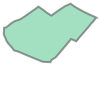

In [9]:
neighborhoods.geometry[1]

In [140]:
neighborhoods.crs

{'init': 'epsg:4326'}

In [158]:
gdf_311.crs={'init': 'epsg:4326'}

In [159]:
gdf_311.crs

{'init': 'epsg:4326'}

In [15]:
sjoined_listings = gpd.sjoin(geojson_311_2018, neighborhoods, op="within")
#sjoined_listings.head()

In [16]:
sjoined_listings.head()

,OPENEDDATETIME,TYPENAME,geometry,index_right,BDNAME
0,2018-05-03T16:09:59,Parking Violation Complaint,POINT (-93.28989 45.00952),22,Hawthorne
29,2018-05-06T11:38:53,Debris in the Street or Alley,POINT (-93.28863 45.00772),22,Hawthorne
132,2018-06-26T17:32:10,Exterior Nuisance Complaint,POINT (-93.28567 45.01073),22,Hawthorne
268,2018-03-28T15:43:00,Abandoned Vehicle,POINT (-93.29361 45.00595),22,Hawthorne
291,2018-04-23T17:33:41,Traffic Sign Repair - Open311,POINT (-93.28103 45.00591),22,Hawthorne


In [11]:
import matplotlib.pyplot as plt
import descartes

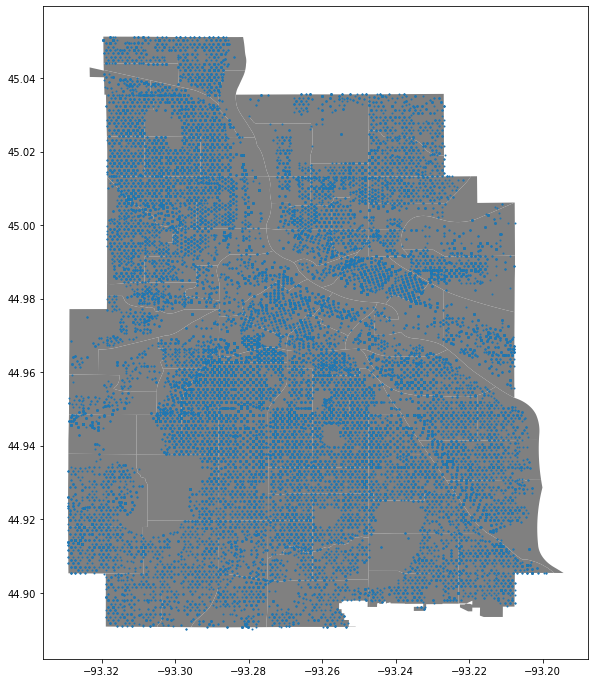

In [46]:
#plot individual 311 incidents
fig, ax = plt.subplots(figsize=(12,12))
neighborhoods.plot(color="Gray", ax= ax);
nonzeroGeo.plot(ax=ax, markersize=1);

In [50]:
import geoplot

In [56]:
nonzeroGeo.count()

OPENEDDATETIME    58147
TYPENAME          58147
geometry          58147
dtype: int64

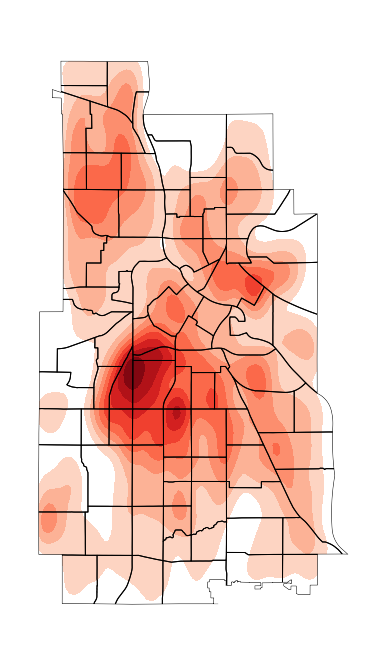

In [58]:
ax = geoplot.kdeplot(
    nonzeroGeo, clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

In [17]:
grouped = sjoined_listings.groupby('BDNAME').size()
df = grouped.to_frame().reset_index()
df.columns = ['BDNAME', 'listings_count']

In [20]:
geojson_311_2018.columns

Index(['OPENEDDATETIME', 'TYPENAME', 'geometry'], dtype='object')

In [21]:
merged_areas = neighborhoods.merge(df, on='BDNAME', how='outer')

In [22]:
merged_areas

,BDNAME,geometry,listings_count
0,Phillips West,"POLYGON ((-93.26258 44.96091, -93.26512 44.960...",751
1,Downtown West,"POLYGON ((-93.26011 44.98300, -93.26011 44.983...",1233
2,Downtown East,"POLYGON ((-93.24499 44.97893, -93.24501 44.978...",375
3,Ventura Village,"POLYGON ((-93.24958 44.96630, -93.24977 44.966...",880
4,Sumner - Glenwood,"POLYGON ((-93.28830 44.98904, -93.28840 44.989...",140
...,...,...,...
82,Columbia Park,"POLYGON ((-93.24735 45.02568, -93.24735 45.025...",214
83,Waite Park,"POLYGON ((-93.22687 45.01892, -93.22687 45.018...",539
84,Marshall Terrace,"POLYGON ((-93.27792 45.02761, -93.27802 45.027...",202
85,Whittier,"POLYGON ((-93.26954 44.96269, -93.26957 44.962...",2391


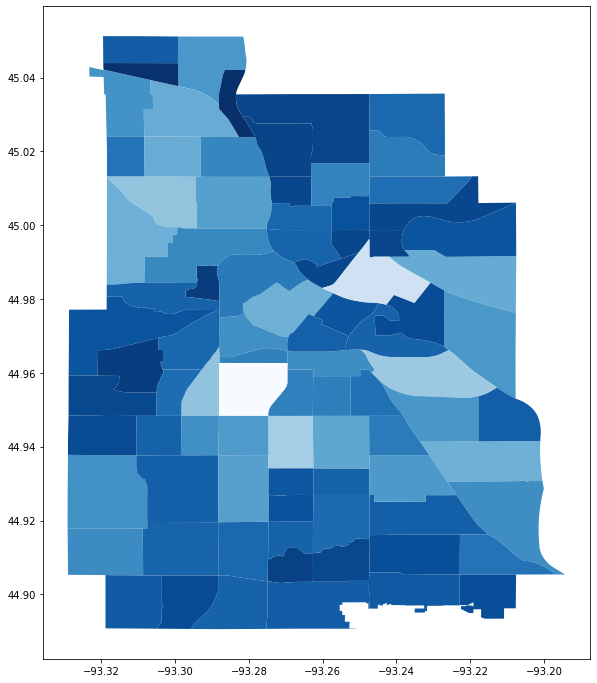

In [47]:
# plot 311 incidents by neighborhood
merged_areas.plot(column="listings_count", cmap="Blues_r", figsize=(12,12));

In [18]:
df

,BDNAME,listings_count
0,Armatage,413
1,Audubon Park,717
2,Bancroft,488
3,Beltrami,218
4,Bottineau,235
...,...,...
82,West Calhoun,273
83,Whittier,2391
84,Willard - Hay,1220
85,Windom,491


## Liquor licenses data

In [7]:
dfOffLiq=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/Off_Sale_Liquor.csv')

In [8]:
dfOffLiq.head()

,X,Y,apn,OBJECTID,licenseNumber,licenseType,licenseStatus,liquorType,issueDate,expirationYear,...,licenseName,address,endorsements,ward,neighborhood,lat,long,xWebMercator,yWebMercator,lastUpdateDate
0,-93.246910,44.967160,2.502924e+12,1,LIC54106,BLLiqOff,Approved,Off Sale,2016-04-01T00:00:00.000Z,2020,...,CEDAR RIVERSIDE LIQUOR STORE,617 CEDAR AVE S,NaN,6.0,Cedar Riverside,44.96716,-93.24691,-1.038020e+07,5.616353e+06,2019-05-08T18:16:15.000Z
1,-93.240066,44.991750,1.302924e+12,2,LIC360439,BLLiqOff,Pending,Off Sale,2018-05-21T08:19:19.000Z,2020,...,OMBIBULOUS,949 HENNEPIN AVE E,NaN,3.0,Beltrami,44.99175,-93.24007,-1.037944e+07,5.620223e+06,2019-10-21T18:16:33.000Z
2,-93.296023,44.979459,2.102924e+12,3,LIC361295,BLDistill,Pending,Off Sale,2019-07-08T15:40:37.000Z,2020,...,ROYAL FOUNDRY CRAFT SPIRITS CORP,241 FREMONT AVE N,"Distillery, Off-Sale Distilled Spirits",5.0,Harrison,44.97946,-93.29602,-1.038567e+07,5.618288e+06,2019-10-21T18:16:33.000Z
3,-93.275135,44.976410,2.702924e+12,4,LIC353673,BLBrewery,Approved,Off Sale,2019-10-18T07:58:19.000Z,2020,...,ROCK BOTTOM BREWERY,800 LASALLE AVE,Off Sale Malt Liquor - Growler,7.0,Downtown West,44.97641,-93.27513,-1.038334e+07,5.617808e+06,2019-10-21T18:16:33.000Z
4,-93.277463,44.987550,2.202924e+12,5,LIC353675,BLBrewery,Approved,Off Sale,2019-10-18T07:58:08.000Z,2020,...,LOOSE WILES FREEHOUSE,701 WASHINGTON AVE N,Off Sale Malt Liquor - Growler,3.0,North Loop,44.98754,-93.27745,-1.038360e+07,5.619562e+06,2019-10-21T18:16:33.000Z


In [10]:
dfOnLiq=pd.read_csv('/Users/Simon/Documents/UW Data Science/DS785 Capstone/Minneapolis Open Data/On_Sale_Liquor.csv')

In [12]:
dfOnLiq.columns

Index(['X', 'Y', 'apn', 'OBJECTID', 'licenseNumber', 'licenseType',
       'licenseStatus', 'liquorType', 'issueDate', 'expirationYear',
       'expirationDate', 'licenseName', 'address', 'endorsements', 'ward',
       'neighborhood', 'lat', 'long', 'xWebMercator', 'yWebMercator',
       'lastUpdateDate'],
      dtype='object')